# **Implementación de una técnica de aprendizaje máquina sin el uso de un framework**
### Módulo 2: Machine Learning
*Adrián Emmanuel Faz Mercado A01570770*

**Instrucciones**: Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) sin usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado.

Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.

Trabajaré con la implementación del algoritmo de **Regresión Logística**, implementandola en un problema que solamente tiene 2 posibles resultados (binomial).

## Carga de datos

Creamos las listas de los datos que estaremos utilizando, que en este caso son la cantidad de horas que la planta estuvo expuesta al sol por día y la variable que nos dice si sobrevivió al mes.

En este caso, estaremos utilizando datos que vienen de un archivo CSV, el cual solamente contiene 2 columnas, las horas promedio por día que pasó la planta en el sol ("Hours_of_Sunlight"), y la variable que nos indica si sobrevivió después de un mes. ("Survived").

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("plants_sunlight_data.csv")
print(data)

# Crear lista con los valores de la variable independiente (hours_of_sunlight)
x = data["Hours_of_Sunlight"].to_list()

# Crear lista con los valores de la variable dependiente (Pass: no = 0, yes = 1)
y = data["Survived"].to_list()

# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [0.1,0.1]

# Cargamos el valor del learning rate (alpha)
alpha = 0.01

    Hours_of_Sunlight  Survived
0                5.67         1
1                3.35         0
2                2.42         0
3                5.93         1
4                5.10         1
..                ...       ...
95               4.72         1
96               5.85         1
97               1.16         0
98               5.09         1
99               5.21         1

[100 rows x 2 columns]


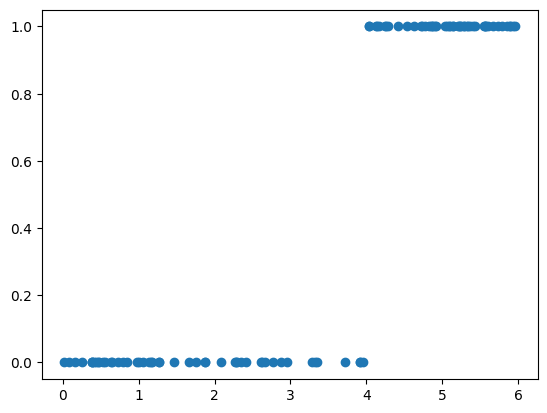

In [27]:
# Los datos se distribuyen de la siguiente manera.

plt.scatter(x,y)



Dada la gráfica, se espera que los valores que se encuentran entre 0 y 4 horas de sol por día en promedio no sobrevivan, mientras que los que están entre 4 y 6 horas sí sobreviven.

También ocupamos una alternativa que nos permita estimar fácilmente la variable dependiente y el total de muestras. Dado que implementaremos la función logística, ocupamos la función exponencial, por lo que requerimos el módulo **math**:

In [28]:
# Importar módulo math
import math
# Creamos la función lambda para la función de hipótesis
h = lambda x,theta: 1 / (1 + math.exp(-(theta[0]+theta[1]*x)))
# Calculamos el total de muestras a partir de los datos (n)
n = len(y)

Definimos el número de iteraciones a realizar para ajustar los valores de los thetas.

In [29]:
# Definir total de iteraciones a ejecutar
num_iter = 10000

## Iteraciones
En cada iteración debemos calcular el valor de la derivada de la función de costo, que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$ (recuerde que los estimados se obtienen con la función de hipótesis de la regresión logística):

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

Además, debemos actualizar los valores de los hiper-parámetros, recordando que $\theta_j=\theta_j-\alpha \frac{∂J_{θ}}{∂θ_j}$:

In [30]:
# Implementamos ciclo para iteraciones
for _ in range(num_iter):
  delta = []
  delta1 = []
  for xi, yi in zip(x,y):
    pred = h(xi,theta)
    # Calculamos delta para theta0 y para cada muestra
    # Calculamos delta para theta1 y para cada muestra
    delta.append(pred-yi)
    delta1.append((pred-yi)*xi)

  # Calculamos sumatorias y promedio
  dJt0 = 1/n*sum(delta)
  dJt1 = 1/n*sum(delta1)

    # Actualizamos theta0
    # Actualizamos theta1

  theta0 = theta[0] - alpha*dJt0
  theta1 = theta[1] - alpha*dJt1
  theta = [theta0, theta1]

# Imprimimos nuestros thetas actualizado

print(theta)

[-5.334103358722053, 1.5482712581534883]


## Evaluación del modelo con pruebas.

Para probar el modelo, usaremos una parte del set de datos que no se utilizó para entrenar el modelo, y así revisar que tan adecuado es.

In [31]:
# Creamos las listas de las "x" y "y" de prueba.

# La variable x_prueba son los valores de x que probaremos y y_prueba son los valores correctos que deberían de ser esperados en nuestro modelo, veremos si son los mismos o que tan parecidos.
x_prueba = [3.47,1.88,4.97,3.8,3.21,5.95,2.29,5.17,6.12,2.54]
y_prueba = [0,0,1,0,0,1,0,1,1,0]

# Creamos la lista vacía donde se acumularán las predicciones del modelo.
pred = []

# Barremos la entrada y estimamos las salidas:

for xi in x_prueba:
  result = round(h(xi, theta))
  pred.append(result)

# Revisamos las y's reales de la prueba contra las predicciones realizadas con el modelo.
print(y_prueba)
print(pred)


[0, 0, 1, 0, 0, 1, 0, 1, 1, 0]
[1, 0, 1, 1, 0, 1, 0, 1, 1, 0]


Ahora que ya tenemos los valores de las predicciones con nuestras x de prueba, podemos obtener los valores de diferentes métricas para estimar que tan bueno es nuestro clasificador.

$accuracy = \frac{VP+VN}{VP+VN+FP+FN}$

$precision = \frac{VP}{VP+FP}$

$recall = \frac{VP}{VP+FN}$

$F1 = \frac{2\cdot precision \cdot recall}{precision+recall}$

In [32]:
# Inicializar contadores para VP, FP, VN, FN

vp = 0
vn = 0
fp = 0
fn = 0

# Barremos nuestros datos reales y nuestras predicciones
for yr, yp in zip(y_prueba,pred):
  if yr == 1 and yp == 1:
    vp += 1
  elif yr == 0 and yp == 0:
    vn += 1
  elif yr == 1 and yp == 0:
    fn += 1
  elif yr == 0 and yp == 1:
    fp += 1
  else:
    print("Error")

# Imprimimos nuestra matriz de confusión
print(f"Verdaderos positivos: {vp}")
print(f"Verdaderos negativos: {vn}")
print(f"Falsos positivos: {fp}")
print(f"Falsos negativos: {fn}")


# Calculamos los valores de nuestras métricas
accuracy = round((vp + vn) / (vp + vn + fp + fn) * 100,2)
precision = round(vp / (vp + fp) * 100,2)
recall = round(vp / (vp + fn) * 100,2)
f1 = (2*precision*recall) / (precision + recall)

print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall {recall}%")
print(f"F1: {f1}")

Verdaderos positivos: 4
Verdaderos negativos: 4
Falsos positivos: 2
Falsos negativos: 0
Accuracy: 80.0%
Precision: 66.67%
Recall 100.0%
F1: 80.00239995200096


En este caso, se analizó el efecto de la cantidad de horas promedio por día que una planta se expone al sol y en base a eso, tratamos de predecir si la planta va a sobrevivir o no.

Se trabajó con un una regresión logística con solamente 2 posibles salidas, buscando que se pueda clasificar si una planta sobreviviría o no sobreviviría, tomando como entrenamiento los datos que se le presentaron.

Finalmente, se obtuvieron las métricas de desempeño del modelo con una muestra de 10 datos de prueba, y si bien los resultados fueron buenos, es importante tomar en cuenta que para tener una mayor certeza sería bueno considerar usar una mayor muestra para pruebas, y buscar que los datos estén distribuidos lo más adecuado posible.

Al revisar las pruebas y el modelo, se podría decir que está aprendiendo la tendencia correctamente, pues mientras menos sean las horas promedio que la planta estuvo expuesta al sol, menor es la probabilidad de que sobreviva.

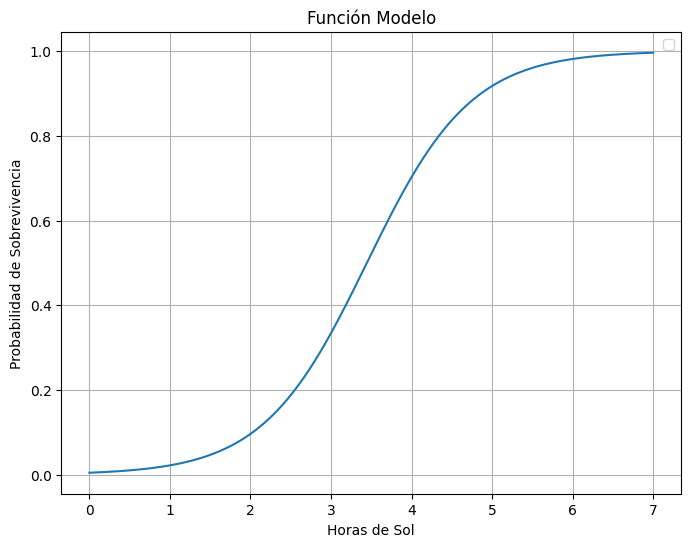

In [33]:
# Finalmente, la función del modelo se ve de la siguiente manera:

import matplotlib
import numpy as np

x = np.linspace(0, 7, 1000)

# Calcula y utilizando la función lambda para cada valor de x
y = [h(i,theta) for i in x]

# Graficando la función
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.title('Función Modelo')
plt.xlabel('Horas de Sol')
plt.ylabel('Probabilidad de Sobrevivencia')
plt.grid(True)
plt.show()

# Para seguir analizando el modelo, habría que quizás usar más datos de entrenamiento y probar con diferentes valores iniciales de theta y modificar el learning rate.